# <span><center>Microproyecto 1: Generación de paleta de colores a partir de imágenes con técnias de Machine Learning No supervisado</center></span>

## Equipo 16: Mateo Hernandez Gualdron - Martin Alejandro Quintero Rincon

#### Universidad de los Andes, Maestría en Inteligencia Artificial.
#### Machine Learning No Supervisado (MLNS)
______________________________________________________________________________________________________________________________________________

En este notebook se analiza la paleta de colores en el arte mediante técnicas de aprendizaje automático no supervisado.  
La paleta de colores, entendida como el conjunto característico de tonalidades empleadas por un artista o movimiento, trasciende lo meramente estético: refleja decisiones técnicas, condicionantes históricos y dimensiones psicológicas y simbólicas.  

El estudio de las paletas permite comprender cómo los artistas expresan emociones y construyen su identidad visual, además de evidenciar la influencia de factores como la disponibilidad de pigmentos, las corrientes culturales y las narrativas iconográficas. Asimismo, ofrece claves para reconocer la armonía y coherencia estilística propias de cada periodo artístico.  

---

## Obras seleccionadas para el análisis (10)

| Obra                                                                                     | Año     | Descripción breve                                                                 | Periodo |
|------------------------------------------------------------------------------------------|---------|-----------------------------------------------------------------------------------|----------|
| [Portrait of Lorenzo the Magnificent, Agnolo Bronzino](https://storage.googleapis.com/kagglesdsdata/datasets/2477766/4202543/Mannerism_Late_Renaissance/agnolo-bronzino_portrait-of-lorenzo-the-magnificent.jpg) | ca. 1530 | Retrato manierista de Lorenzo de Médici, destacando la elegancia estilizada.       | Manierismo / Renacimiento tardío |
| [The Incredulity of Saint Thomas, Caravaggio](https://storage.googleapis.com/kagglesdsdata/datasets/2477766/4202543/Baroque/caravaggio_incredulity-of-saint-thomas%281%29.jpg) | 1601–1602 | Escena bíblica con realismo dramático y claroscuro intenso.                        | Barroco |
| [The Wanderer above the Sea of Fog, Caspar David Friedrich](https://storage.googleapis.com/kagglesdsdata/datasets/2477766/4202543/Romanticism/caspar-david-friedrich_the-wanderer-above-the-sea-of-fog.jpg) | 1818    | Figura solitaria frente al sublime paisaje nebuloso, símbolo del Romanticismo.     | Romanticismo |
| [Christ among the Doctors, Albrecht Dürer](https://storage.googleapis.com/kagglesdsdata/datasets/2477766/4202543/Northern_Renaissance/albrecht-durer_christ-among-the-doctors-1506.jpg) | 1506    | Cristo niño discutiendo con los doctores, composición detallada del Renacimiento. | Renacimiento del Norte |
| [El Matador, Pablo Picasso](https://storage.googleapis.com/kagglesdsdata/datasets/2477766/4202543/Cubism/pablo-picasso_matador-1970.jpg) | 1970    | Figura taurina estilizada, síntesis tardía de su lenguaje cubista.                 | Cubismo tardío |
| [Western Motel, Edward Hopper](https://storage.googleapis.com/kagglesdsdata/datasets/2477766/4202543/New_Realism/edward-hopper_western-motel.jpg) | 1957    | Escena silenciosa y enigmática en un motel norteamericano.                         | Realismo / New Realism |
| [Charing Cross Bridge, André Derain](https://storage.googleapis.com/kagglesdsdata/datasets/2477766/4202543/Pointillism/andre-derain_charing-cross-bridge-1906.jpg) | 1906    | Paisaje urbano con pinceladas puntillistas y colores vibrantes.                   | Puntillismo |
| [Still Life, Juan Gris](https://storage.googleapis.com/kagglesdsdata/datasets/2477766/4202543/Analytical_Cubism/juan-gris_not_detected_207834.jpg) | ca. 1910–1914 | Bodegón analítico con fragmentación geométrica de objetos.                         | Cubismo analítico |
| [Goya’s Lover, Walasse Ting](https://storage.googleapis.com/kagglesdsdata/datasets/2477766/4202543/Action_painting/walasse-ting_goya-s-lover-1977.jpg) | 1977    | Expresividad gestual y color vibrante en estilo libre.                            | Action Painting |
| [Vesuvius, Andy Warhol](https://storage.googleapis.com/kagglesdsdata/datasets/2477766/4202543/Pop_Art/andy-warhol_vesuvius.jpg) | 1985    | Repetición icónica del volcán Vesubio con estética pop.                            | Pop Art |

In [9]:
from sklearn.cluster import KMeans, MeanShift
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [25]:
def leerfoto(foto, clusters):
  imagen = cv2.imread(foto)
  # BGR2RGB
  imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
  h, w, c = imagen_rgb.shape
  datos_clustering = imagen_rgb.reshape((-1, 3))
  kmeans = KMeans(n_clusters=clusters, random_state=77, n_init="auto")
  kmeans.fit(datos_clustering)
  etiquetas = kmeans.labels_
  centros = kmeans.cluster_centers_
  imagen_segmentada = centros[etiquetas]
  # Reshape
  imagen_segmentada = imagen_segmentada.reshape((h, w, c))
  imagen_segmentada = imagen_segmentada.astype(np.uint8)
  centroides_img = np.zeros((100, len(centros) * 35, 3), dtype=np.uint8)
  for i, centro in enumerate(centros):
      inicio = i * 35
      fin = (i + 1) * 35
      centroides_img[:, inicio:fin] = centro.astype(np.uint8)
  f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
  ax1.imshow(imagen_rgb)
  ax1.set_title(f'{foto}')
  ax1.axis('off')

  ax2.imshow(imagen_segmentada)
  ax2.set_title(f'Segmentada K-Means (k={kmeans.n_clusters})')
  ax2.axis('off')

  ax3.imshow(centroides_img)
  ax3.set_title('Paleta de colores')
  ax3.axis('off')
  return np.shape(imagen_rgb)

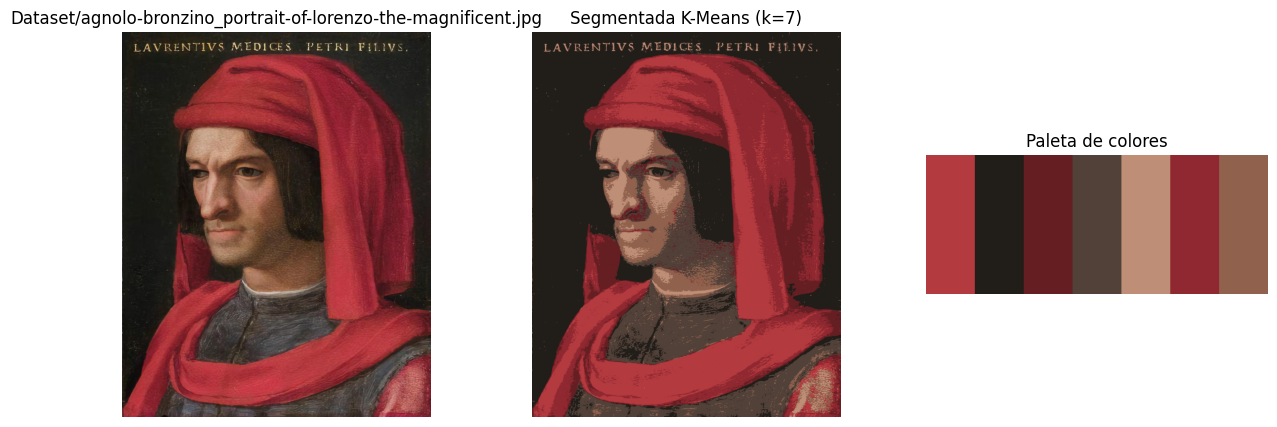

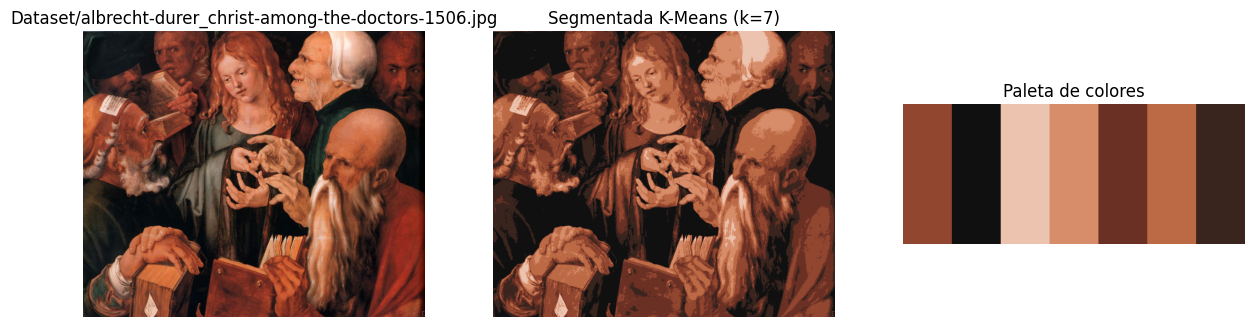

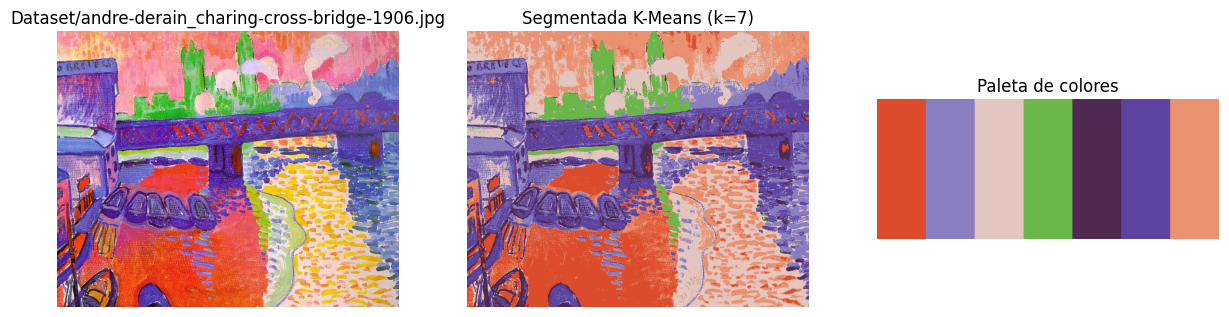

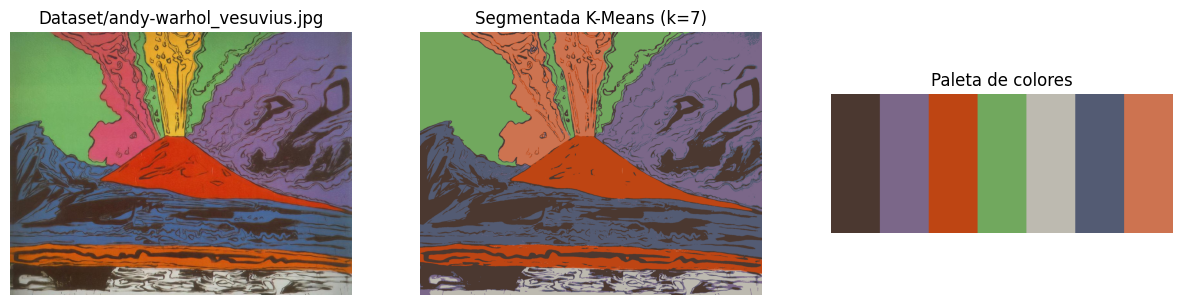

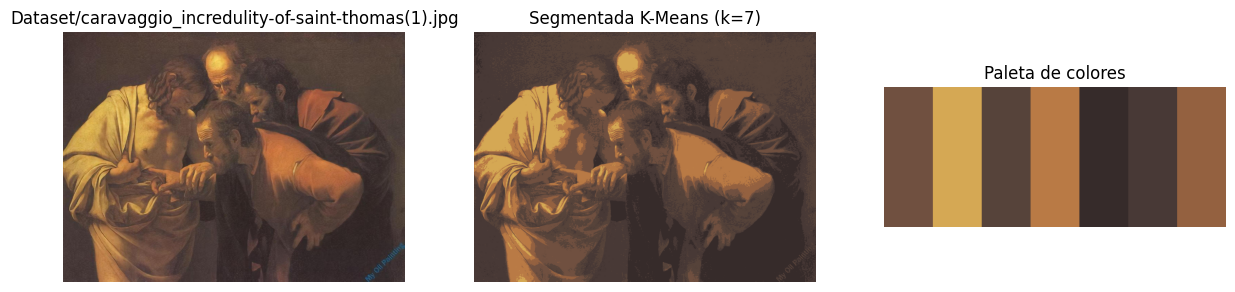

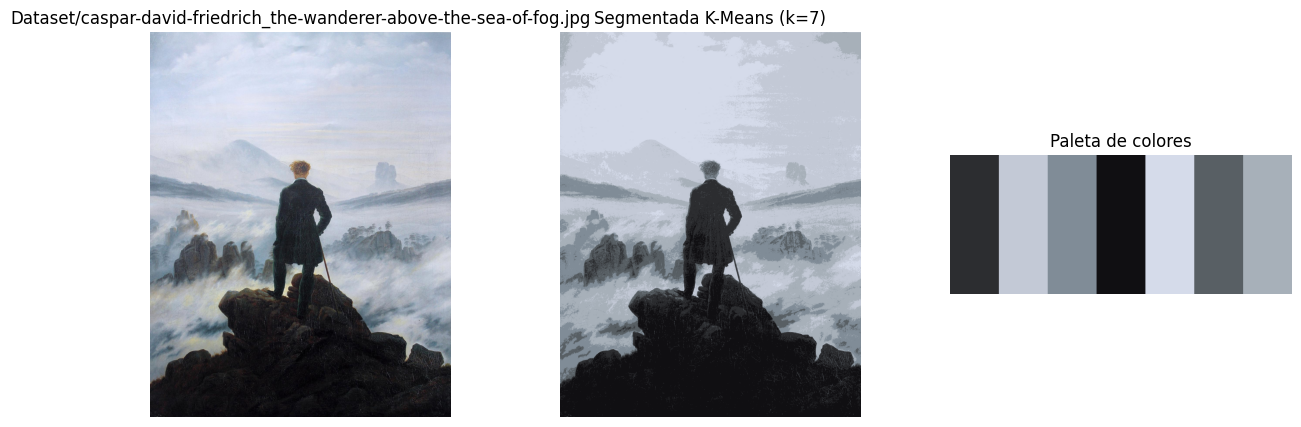

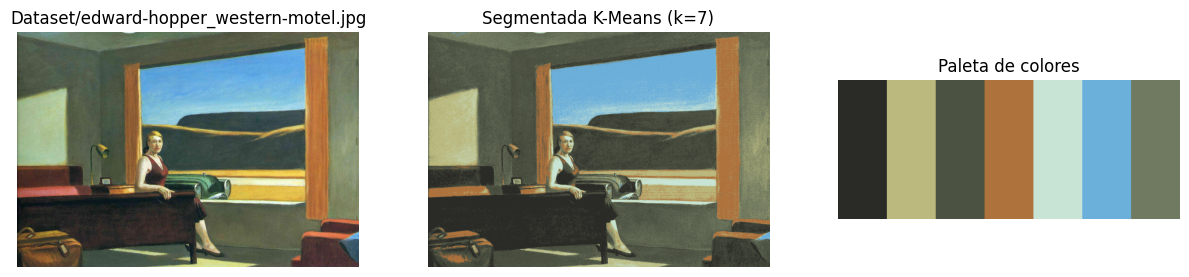

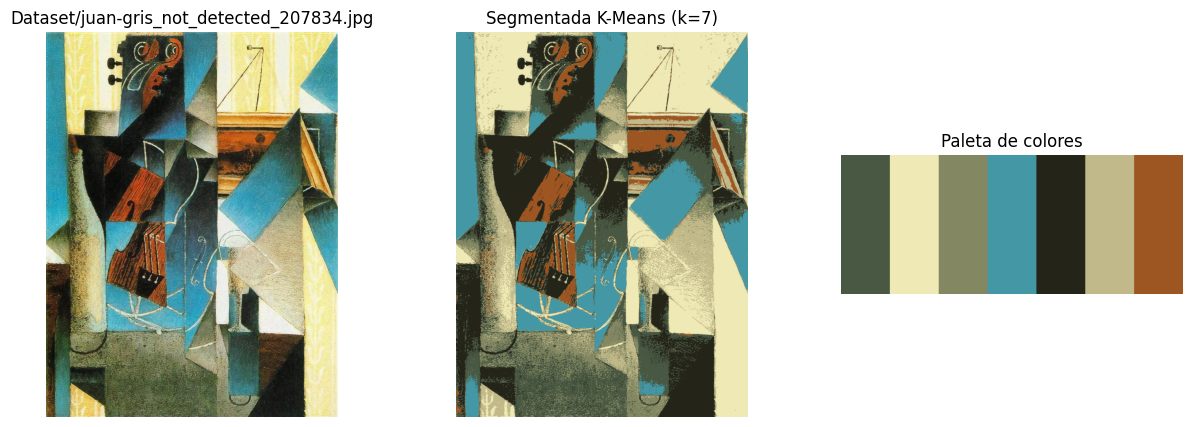

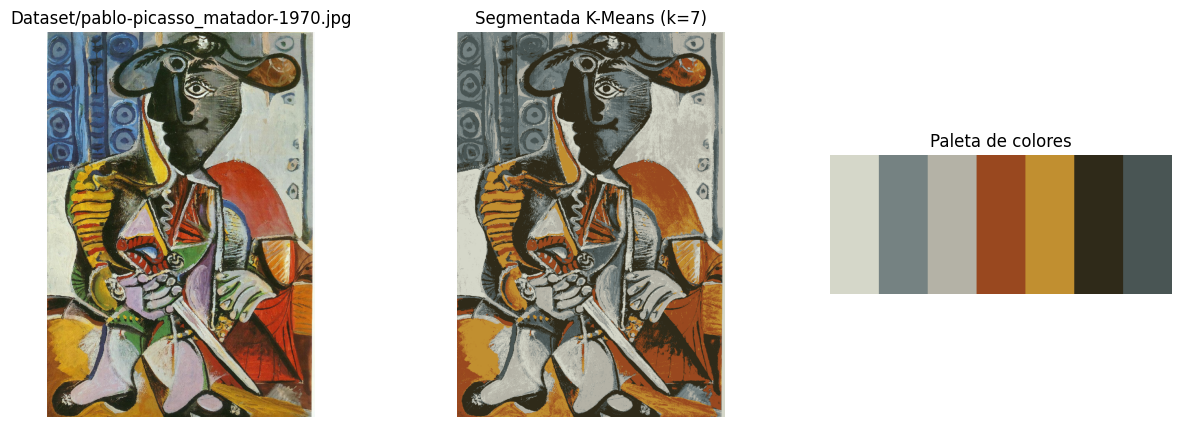

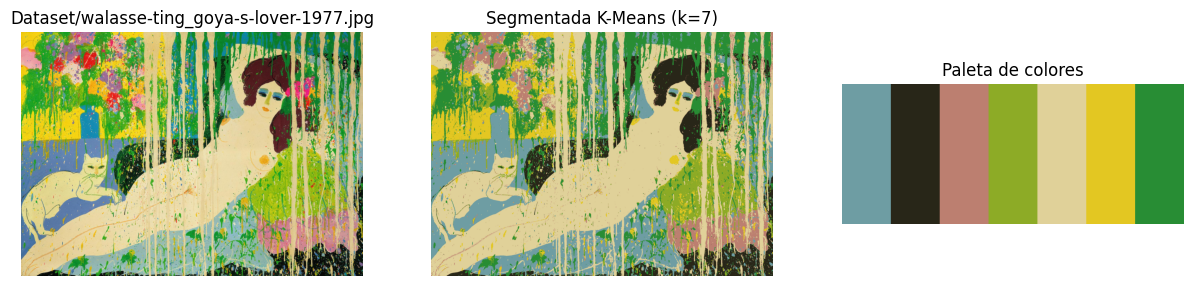

In [26]:
path = 'Dataset/'
for i in os.listdir(path):
    leerfoto(os.path.join(path, i), 7)